<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en Estados Unidos </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/crimenesUSA.png" align="middle" style="width:550px;"/></td>
<td>
    
En este proyecto se analizaran datos de arrestos en Estados Unidos en el año 1973 por cada 100,000 habitantes. También proporciona el porcentaje de la población que vive en áreas urbanas dentro del estado.    

Las variables del archivo de datos son:
    
'US_state'  :  Entidad de Estados Unidos
    
'UrbanPop' : Porcentaje de población urbana
    
'Murder' : Asesinato
    
'Assault' : Asalto 
    
'Rape' :   Abuso   

    
<br>
</td>
</tr>
</table>

# 1. Importar librerías generales

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

# 2. Obtención de datos

In [2]:
# Ubicación de los datos en github
#url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv'
#df = pd.read_csv(url)

df = pd.read_csv('datos/USArrests.csv') 

In [3]:
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [4]:
#renombramos la primera columna
df = df.rename(columns={'Unnamed: 0': 'US_state'})

In [5]:
df = df[['US_state', 'UrbanPop', 'Murder', 'Assault','Rape']]

In [6]:
df.head()

US_state  UrbanPop  Murder  Assault  Rape
0     Alabama        58    13.2      236  21.2
1      Alaska        48    10.0      263  44.5
2     Arizona        80     8.1      294  31.0
3    Arkansas        50     8.8      190  19.5
4  California        91     9.0      276  40.6

# 3. Análisis Exploratorio

In [7]:
#Principales parámetros estadísticos
df.describe().transpose()

count     mean        std   min      25%     50%      75%    max
UrbanPop   50.0   65.540  14.474763  32.0   54.500   66.00   77.750   91.0
Murder     50.0    7.788   4.355510   0.8    4.075    7.25   11.250   17.4
Assault    50.0  170.760  83.337661  45.0  109.000  159.00  249.000  337.0
Rape       50.0   21.232   9.366385   7.3   15.075   20.10   26.175   46.0

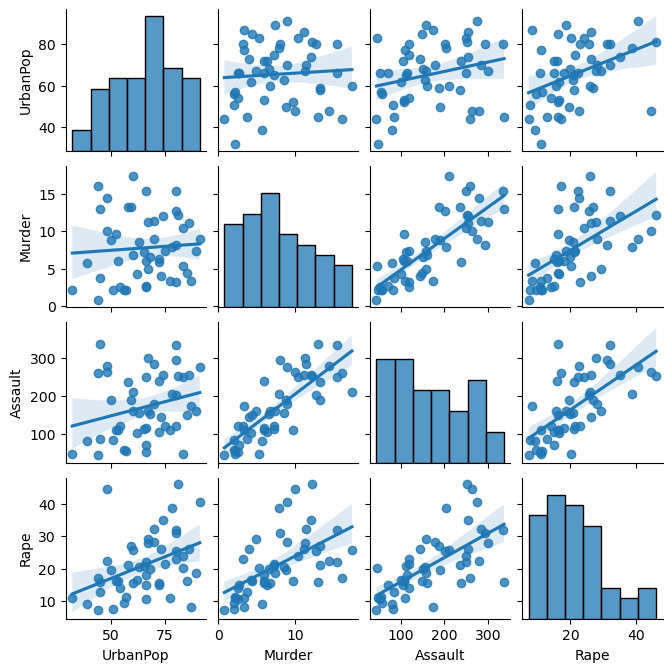

In [8]:
# Correlación lineal de variables
sns.pairplot(df, kind="reg",  height=1.7 , aspect=1)

# 4. Normalización de datos

In [9]:
#Selección de caracteristicas para llevar a cabo el agrupamiento
features = ['Murder','Assault','UrbanPop','Rape']

In [10]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])

In [11]:
df_standardized 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

(array([5., 8., 5., 9., 6., 3., 5., 4., 3., 2.]),
 array([-1.62069341, -1.23569755, -0.85070169, -0.46570583, -0.08070998,
         0.30428588,  0.68928174,  1.0742776 ,  1.45927346,  1.84426932,
         2.22926518]),
 <BarContainer object of 10 artists>)

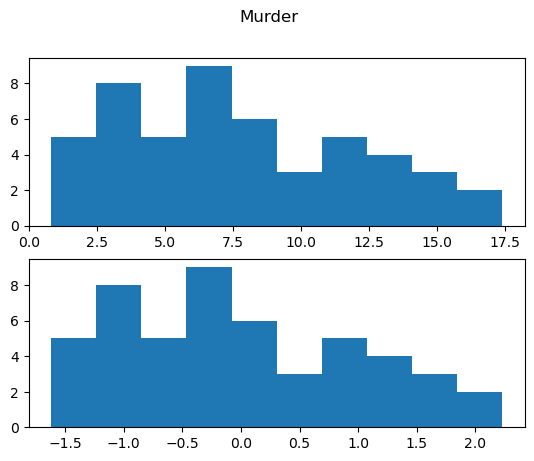

In [12]:
#Comparación antes y despues de la normalización (re-escalamiento)
Murder_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Murder')
ax1.hist(df['Murder'])
ax2.hist( Murder_list)

In [13]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)

In [14]:
df_standardized.head()

0         1         2         3
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814

# 5. Separación de los datos en grupos

In [15]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', n_init='auto', random_state = 42)
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

200.0

# 6. Método del codo

In [16]:
# Se obtienen los diferentes valores de WCSS 
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[200.0,
 104.96163315756873,
 84.30010772989174,
 57.55425863091106,
 52.02451536103698,
 45.497694867451386,
 42.9965749398532,
 35.69587706333374,
 33.788262478610406,
 30.323525218359453,
 28.8650210885779,
 26.750252132081563]

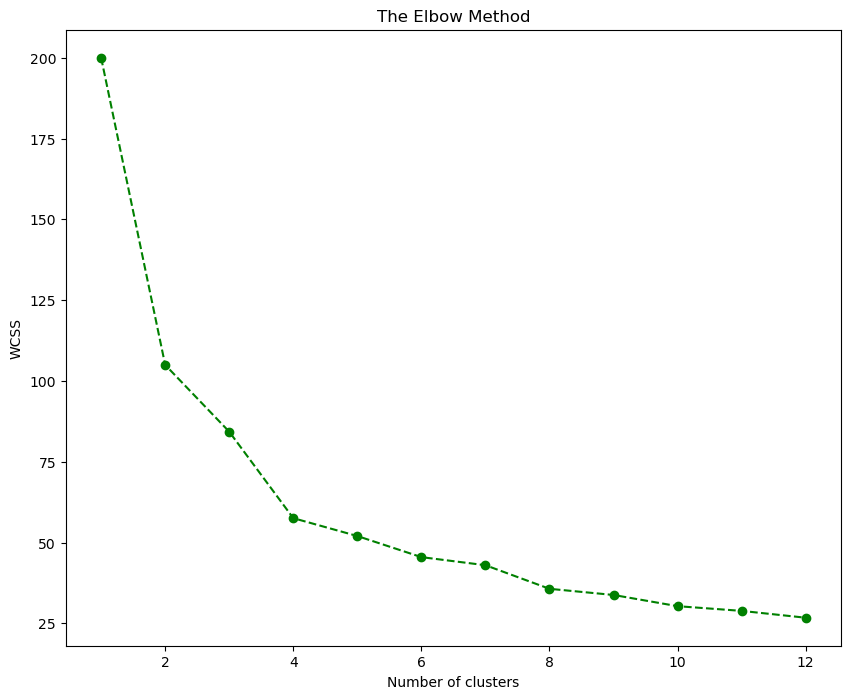

In [18]:
# Grafica de los valores de WCSS 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 7. Análisis de resultados

In [19]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [20]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster'] = y_kmeans + 1
df.head()

US_state  UrbanPop  Murder  Assault  Rape  cluster
0     Alabama        58    13.2      236  21.2        2
1      Alaska        48    10.0      263  44.5        3
2     Arizona        80     8.1      294  31.0        3
3    Arkansas        50     8.8      190  19.5        2
4  California        91     9.0      276  40.6        3

<Axes: xlabel='Murder', ylabel='Assault'>

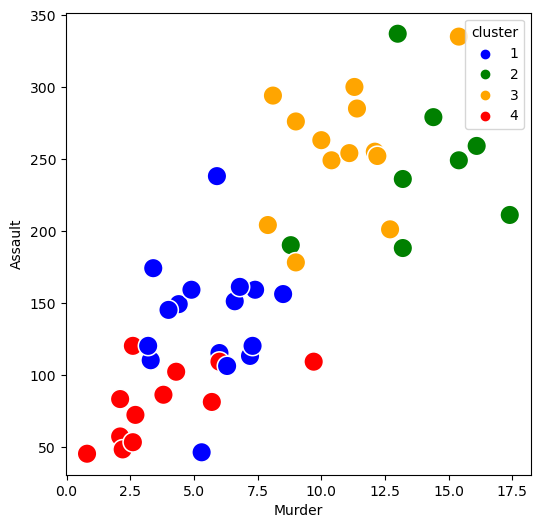

In [21]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Murder', y = 'Assault', hue='cluster',  
                palette=['blue','green','orange','red'] , data=df, s=200)

<Figure size 500x500 with 0 Axes>

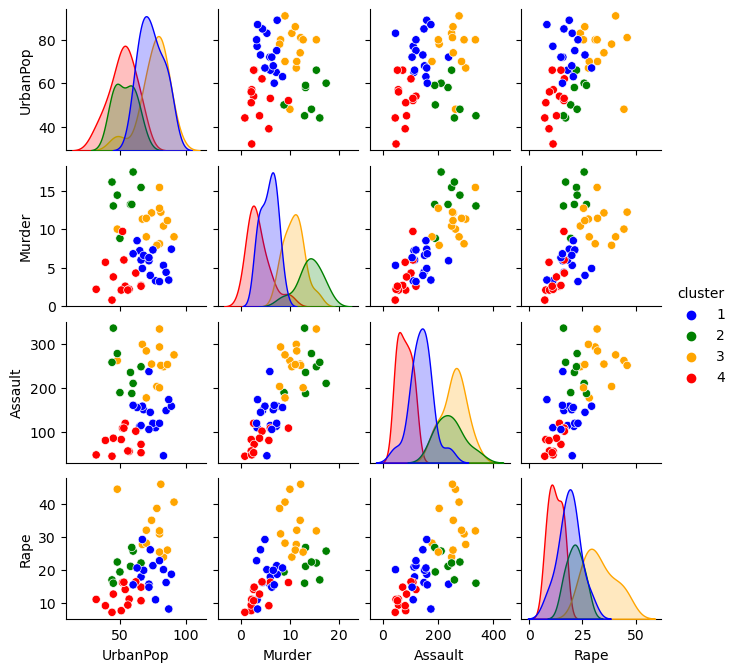

In [22]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df, hue="cluster",  palette=['blue','green','orange','red'],height=1.7 , aspect=1)
plt.show()

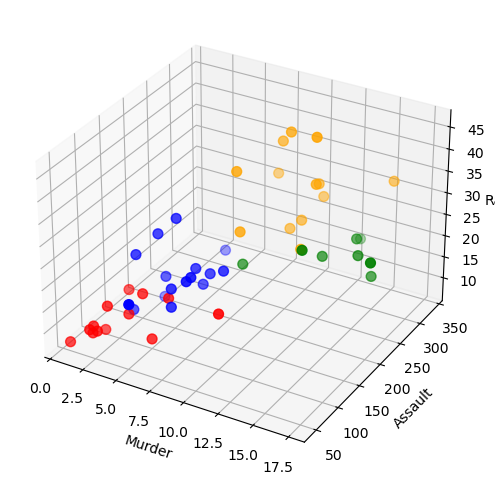

In [23]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Murder']
y = df['Assault']
z = df['Rape']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [24]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df
df_map.head()

US_state  UrbanPop  Murder  Assault  Rape  cluster
0     Alabama        58    13.2      236  21.2        2
1      Alaska        48    10.0      263  44.5        3
2     Arizona        80     8.1      294  31.0        3
3    Arkansas        50     8.8      190  19.5        2
4  California        91     9.0      276  40.6        3

In [25]:
# Información geográfica de los Estados Unidos
estados_geo = 'datos/estados_usa.json'

In [26]:
# Librería Python que permite crear mapas interactivos 
import folium
map = folium.Map(location=[53,-102], tiles='cartodbpositron',zoom_start=2.5)

In [27]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['US_state', 'cluster'],
             key_on='feature.properties.name',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map)
map

## Observaciones

<img src="figuras/analisis_datos.jpg" align="middle" style="width:850px;"/></td>

Grupo 1(azul): La región del Sureste  los asesinatos tienen altos índices de asesinatos.

Grupo 2(verde): Se encuentra en el Centro y tiene valores promedio. 

Grupo 3(anaranjado-rosa): Se encuentra al Norte y se destaca por la tasa mínima de delitos.

Grupo 4(rojo): Los estados del Suroeste  tienen los mas altos índices de asaltos y violaciones.



# Metodo Silhouette


In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
silhouette_score(df_standardized,  kmeans.labels_)

0.33968891433344395

In [30]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++', n_init = 'auto').fit(df_standardized) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

array([0.40848903, 0.36682843, 0.34410807, 0.27074023, 0.26970904,
       0.23072636, 0.24569998, 0.2537512 , 0.26782157, 0.26190543,
       0.26703661])

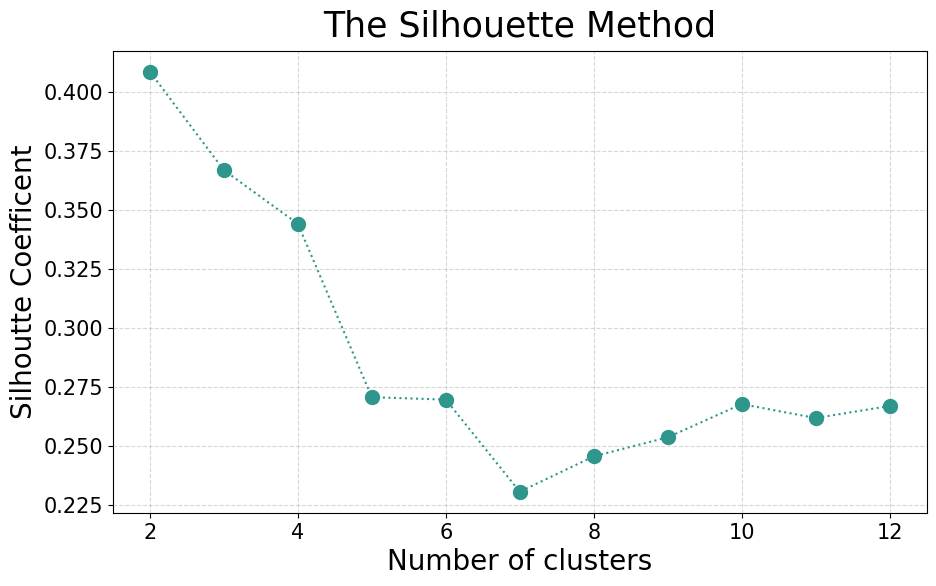

In [31]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [32]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.4084890326217641
El número óptimo de clusters es: 2


##  Análisis

In [33]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [34]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster'] = y_kmeans + 1
df.head()

US_state  UrbanPop  Murder  Assault  Rape  cluster
0     Alabama        58    13.2      236  21.2        2
1      Alaska        48    10.0      263  44.5        2
2     Arizona        80     8.1      294  31.0        2
3    Arkansas        50     8.8      190  19.5        1
4  California        91     9.0      276  40.6        2

<Axes: xlabel='Murder', ylabel='Assault'>

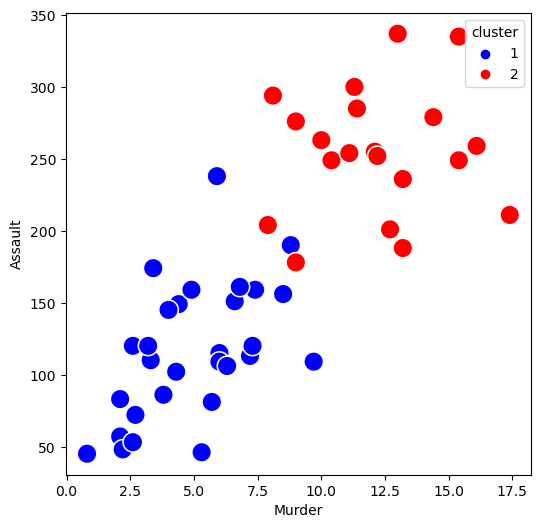

In [35]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Murder', y = 'Assault', hue='cluster',  
                palette=['blue','red'] , data=df, s=200)

<Figure size 500x500 with 0 Axes>

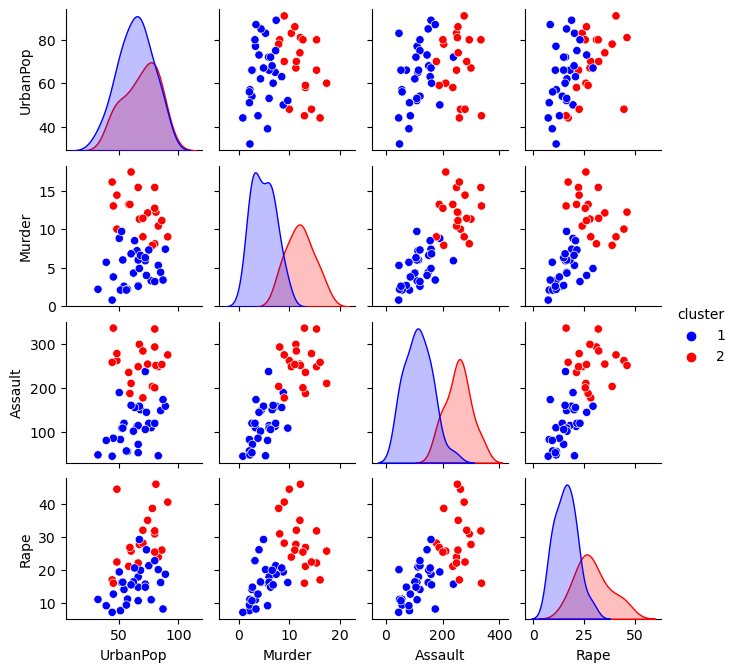

In [36]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df, hue="cluster",  palette=['blue','red'],height=1.7 , aspect=1)
plt.show()

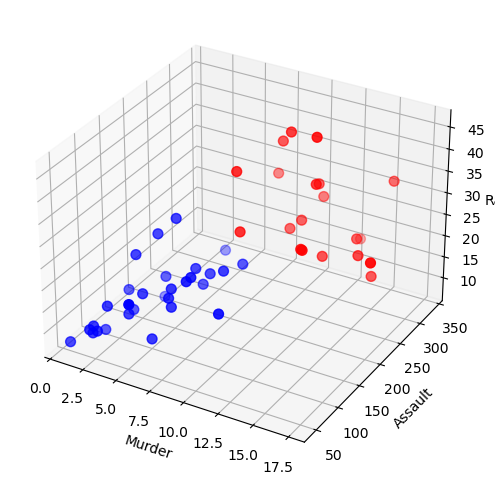

In [37]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Murder']
y = df['Assault']
z = df['Rape']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue', 'red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [38]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df
df_map.head()

US_state  UrbanPop  Murder  Assault  Rape  cluster
0     Alabama        58    13.2      236  21.2        2
1      Alaska        48    10.0      263  44.5        2
2     Arizona        80     8.1      294  31.0        2
3    Arkansas        50     8.8      190  19.5        1
4  California        91     9.0      276  40.6        2

In [39]:
# Información geográfica de los Estados Unidos
estados_geo = 'datos/estados_usa.json'
# Librería Python que permite crear mapas interactivos 
import folium
map = folium.Map(location=[53,-102], tiles='cartodbpositron',zoom_start=2.5)

In [40]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['US_state', 'cluster'],
             key_on='feature.properties.name',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map)
map

# Análisis sobre los datos del archivo indice_paz_mex_impacto-economico_2020.csv

## Obteniendo datos

In [244]:
df = pd.read_csv('datos/indice_paz_mex_impacto-economico_2020.csv', encoding='latin1') 
df.head(5)

Estados  Homicidio  Delitos_con_violencia  \
0       AGUASCALIENTES      1.368                  3.167   
1      BAJA_CALIFORNIA      5.000                  3.296   
2  BAJA_CALIFORNIA_SUR      1.554                  3.411   
3             CAMPECHE      1.533                  1.223   
4              CHIAPAS      1.544                  1.444   

   Delitos_con_armas_fuego  Delincuencia_organizada  Carcel_Sin_sentencia  \
0                    1.490                    3.425                 1.307   
1                    5.000                    5.000                 2.110   
2                    1.274                    5.000                 1.496   
3                    1.345                    1.723                 4.297   
4                    1.372                    1.629                 2.874   

   Impacto_economico_de_la_violencia  \
0                               51.9   
1                              259.6   
2                               28.8   
3                               21.6   
4                               78.7   

  Impacto_economico_per_capita_de_la_violencia  porcen_pib  
0                                       36,158        14.5  
1                                       71,413        31.5  
2                                       35,761        13.4  
3                                       21,543         2.2  
4                                       13,742        17.8

In [245]:
#Cargamos el archivo ddatos/estados_id.csv en un DataFrame llamado df_estados
df_estados = pd.read_csv('datos/estados_id.csv',encoding='Latin-1') 
df_estados.head()

ENTIDAD IDNAME
0       Aguascalientes     AS
1      Baja California     BC
2  Baja California Sur     BS
3             Campeche     CC
4                 CDMX     DF

In [246]:
df_estados.loc[df_estados['ENTIDAD'] == 'CDMX', 'ENTIDAD'] = 'Ciudad de México'

In [247]:
df = df.sort_values('Estados', ascending= True).reset_index()
df

index              Estados  Homicidio  Delitos_con_violencia  \
0       0       AGUASCALIENTES      1.368                  3.167   
1       1      BAJA_CALIFORNIA      5.000                  3.296   
2       2  BAJA_CALIFORNIA_SUR      1.554                  3.411   
3       3             CAMPECHE      1.533                  1.223   
4       4              CHIAPAS      1.544                  1.444   
5       5            CHIHUAHUA      5.000                  2.641   
6      14     CIUDAD_DE_MÉXICO      1.933                  4.107   
7       6             COAHUILA      1.495                  2.274   
8       7               COLIMA      5.000                  3.344   
9       8              DURANGO      1.649                  2.463   
10     13     ESTADO_DE_MÉXICO      2.060                  4.783   
11      9           GUANAJUATO      5.000                  3.313   
12     10             GUERRERO      3.485                  2.308   
13     11              HIDALGO      1.720                  2.732   
14     12              JALISCO      3.008                  2.916   
15     15            MICHOACÁN      4.195                  2.225   
16     16              MORELOS      3.942                  3.429   
17     17              NAYARIT      1.891                  1.266   
18     18           NUEVO_LEÓN      2.023                  2.727   
19     19               OAXACA      2.487                  2.550   
20     20               PUEBLA      1.984                  2.654   
21     21            QUERÉTARO      1.584                  3.013   
22     22         QUINTANA_ROO      3.419                  3.944   
23     23      SAN_LUIS_POTOSÍ      2.662                  2.963   
24     24              SINALOA      2.601                  2.595   
25     25               SONORA      4.300                  2.280   
26     26              TABASCO      2.501                  3.360   
27     27           TAMAULIPAS      2.237                  2.783   
28     28             TLAXCALA      1.583                  1.305   
29     29             VERACRUZ      2.135                  2.178   
30     30              YUCATÁN      1.167                  1.133   
31     31            ZACATECAS      5.000                  2.754   

    Delitos_con_armas_fuego  Delincuencia_organizada  Carcel_Sin_sentencia  \
0                     1.490                    3.425                 1.307   
1                     5.000                    5.000                 2.110   
2                     1.274                    5.000                 1.496   
3                     1.345                    1.723                 4.297   
4                     1.372                    1.629                 2.874   
5                     4.894                    3.290                 1.785   
6                     2.285                    2.378                 1.479   
7                     1.312                    3.204                 1.766   
8                     5.000                    4.224                 1.418   
9                     1.455                    2.904                 2.196   
10                    2.380                    3.536                 1.271   
11                    5.000                    2.657                 1.280   
12                    3.337                    3.962                 1.499   
13                    1.756                    1.672                 1.488   
14                    2.433                    2.589                 1.822   
15                    4.410                    1.856                 1.798   
16                    3.094                    2.420                 1.414   
17                    1.499                    1.614                 5.000   
18                    2.421                    3.393                 1.503   
19                    2.573                    1.628                 1.606   
20                    1.936                    1.561                 1.716   
21                    1.608                

In [248]:
df_estados = df_estados.sort_values('ENTIDAD', ascending= True).reset_index()
df_estados

index              ENTIDAD IDNAME
0       0       Aguascalientes     AS
1       1      Baja California     BC
2       2  Baja California Sur     BS
3       3             Campeche     CC
4       5              Chiapas     CS
5       6            Chihuahua     CH
6       4     Ciudad de México     DF
7       7             Coahuila     CL
8       8               Colima     CM
9       9              Durango     DG
10     10    Estado de MÃ©xico     MC
11     11           Guanajuato     GT
12     12             Guerrero     GR
13     13              Hidalgo     HG
14     14              Jalisco     JC
15     15           MichoacÃ¡n     MN
16     16              Morelos     MS
17     17              Nayarit     NT
18     18          Nuevo LeÃ³n     NL
19     19               Oaxaca     OC
20     20               Puebla     PL
21     21           QuerÃ©taro     QT
22     22         Quintana Roo     QR
23     23     San Luis PotosÃ­     SP
24     24              Sinaloa     SL
25     25               Sonora     SR
26     26              Tabasco     TC
27     27           Tamaulipas     TS
28     28             Tlaxcala     TL
29     29             Veracruz     VZ
30     30             YucatÃ¡n     YN
31     31            Zacatecas     ZS

In [249]:
df.insert(2, 'IDNAME', value = df_estados['IDNAME'])
df

index              Estados IDNAME  Homicidio  Delitos_con_violencia  \
0       0       AGUASCALIENTES     AS      1.368                  3.167   
1       1      BAJA_CALIFORNIA     BC      5.000                  3.296   
2       2  BAJA_CALIFORNIA_SUR     BS      1.554                  3.411   
3       3             CAMPECHE     CC      1.533                  1.223   
4       4              CHIAPAS     CS      1.544                  1.444   
5       5            CHIHUAHUA     CH      5.000                  2.641   
6      14     CIUDAD_DE_MÉXICO     DF      1.933                  4.107   
7       6             COAHUILA     CL      1.495                  2.274   
8       7               COLIMA     CM      5.000                  3.344   
9       8              DURANGO     DG      1.649                  2.463   
10     13     ESTADO_DE_MÉXICO     MC      2.060                  4.783   
11      9           GUANAJUATO     GT      5.000                  3.313   
12     10             GUERRERO     GR      3.485                  2.308   
13     11              HIDALGO     HG      1.720                  2.732   
14     12              JALISCO     JC      3.008                  2.916   
15     15            MICHOACÁN     MN      4.195                  2.225   
16     16              MORELOS     MS      3.942                  3.429   
17     17              NAYARIT     NT      1.891                  1.266   
18     18           NUEVO_LEÓN     NL      2.023                  2.727   
19     19               OAXACA     OC      2.487                  2.550   
20     20               PUEBLA     PL      1.984                  2.654   
21     21            QUERÉTARO     QT      1.584                  3.013   
22     22         QUINTANA_ROO     QR      3.419                  3.944   
23     23      SAN_LUIS_POTOSÍ     SP      2.662                  2.963   
24     24              SINALOA     SL      2.601                  2.595   
25     25               SONORA     SR      4.300                  2.280   
26     26              TABASCO     TC      2.501                  3.360   
27     27           TAMAULIPAS     TS      2.237                  2.783   
28     28             TLAXCALA     TL      1.583                  1.305   
29     29             VERACRUZ     VZ      2.135                  2.178   
30     30              YUCATÁN     YN      1.167                  1.133   
31     31            ZACATECAS     ZS      5.000                  2.754   

    Delitos_con_armas_fuego  Delincuencia_organizada  Carcel_Sin_sentencia  \
0                     1.490                    3.425                 1.307   
1                     5.000                    5.000                 2.110   
2                     1.274                    5.000                 1.496   
3                     1.345                    1.723                 4.297   
4                     1.372                    1.629                 2.874   
5                     4.894                    3.290                 1.785   
6                     2.285                    2.378                 1.479   
7                     1.312                    3.204                 1.766   
8                     5.000                    4.224                 1.418   
9                     1.455                    2.904                 2.196   
10                    2.380                    3.536                 1.271   
11                    5.000                    2.657                 1.280   
12                    3.337                    3.962                 1.499   
13                    1.756                    1.672                 1.488   
14                    2.433                    2.589                 1.822   
15                    4.410                    1.856                 1.798   
16                    3.094                    2.420                 1.414   
17                    1.499                    1.614                 5.000   
18                    2.421                   

In [250]:
df = df.drop ('index', axis = 1)
df.head(2)

Estados IDNAME  Homicidio  Delitos_con_violencia  \
0   AGUASCALIENTES     AS      1.368                  3.167   
1  BAJA_CALIFORNIA     BC      5.000                  3.296   

   Delitos_con_armas_fuego  Delincuencia_organizada  Carcel_Sin_sentencia  \
0                     1.49                    3.425                 1.307   
1                     5.00                    5.000                 2.110   

   Impacto_economico_de_la_violencia  \
0                               51.9   
1                              259.6   

  Impacto_economico_per_capita_de_la_violencia  porcen_pib  
0                                       36,158        14.5  
1                                       71,413        31.5

In [251]:
# Mostramos las columnas
df.columns

Index(['Estados', 'IDNAME', 'Homicidio', 'Delitos_con_violencia',
       'Delitos_con_armas_fuego', 'Delincuencia_organizada',
       'Carcel_Sin_sentencia', 'Impacto_economico_de_la_violencia',
       'Impacto_economico_per_capita_de_la_violencia', 'porcen_pib'],
      dtype='object')

In [252]:
# Mostramos el número de filas y columnas
df.shape

(32, 10)

In [253]:
# Mostramos el tipo de variables
df.dtypes

Estados                                          object
IDNAME                                           object
Homicidio                                       float64
Delitos_con_violencia                           float64
Delitos_con_armas_fuego                         float64
Delincuencia_organizada                         float64
Carcel_Sin_sentencia                            float64
Impacto_economico_de_la_violencia               float64
Impacto_economico_per_capita_de_la_violencia     object
porcen_pib                                      float64
dtype: object

In [254]:
df['Impacto_economico_per_capita_de_la_violencia'] = pd.to_numeric(
    df['Impacto_economico_per_capita_de_la_violencia'].str.replace(',', '')
)
df.dtypes

Estados                                          object
IDNAME                                           object
Homicidio                                       float64
Delitos_con_violencia                           float64
Delitos_con_armas_fuego                         float64
Delincuencia_organizada                         float64
Carcel_Sin_sentencia                            float64
Impacto_economico_de_la_violencia               float64
Impacto_economico_per_capita_de_la_violencia      int64
porcen_pib                                      float64
dtype: object

## Análisis exploratorio

In [255]:
#Principales parámetros estadísticos
df.describe().transpose()

count          mean  \
Homicidio                                      32.0      2.720625   
Delitos_con_violencia                          32.0      2.705656   
Delitos_con_armas_fuego                        32.0      2.575781   
Delincuencia_organizada                        32.0      2.883594   
Carcel_Sin_sentencia                           32.0      1.895000   
Impacto_economico_de_la_violencia              32.0    147.328125   
Impacto_economico_per_capita_de_la_violencia   32.0  37417.093750   
porcen_pib                                     32.0     20.946875   

                                                       std        min  \
Homicidio                                         1.287674      1.167   
Delitos_con_violencia                             0.847171      1.133   
Delitos_con_armas_fuego                           1.260074      1.042   
Delincuencia_organizada                           1.102784      1.454   
Carcel_Sin_sentencia                              0.862432      1.271   
Impacto_economico_de_la_violencia               132.126921     21.600   
Impacto_economico_per_capita_de_la_violencia  16782.902485  11146.000   
porcen_pib                                       12.109766      2.200   

                                                      25%         50%  \
Homicidio                                         1.63275      2.1860   
Delitos_con_violencia                             2.27850      2.7295   
Delitos_con_armas_fuego                           1.49675      2.3575   
Delincuencia_organizada                           1.82275      2.7020   
Carcel_Sin_sentencia                              1.41700      1.5270   
Impacto_economico_de_la_violencia                60.65000    100.3000   
Impacto_economico_per_capita_de_la_violencia  24741.50000  33484.5000   
porcen_pib                                       13.77500     17.1500   

                                                      75%        max  
Homicidio                                         3.59925      5.000  
Delitos_con_violencia                             3.30025      4.783  
Delitos_con_armas_fuego                           3.15475      5.000  
Delincuencia_organizada                           3.57425      5.000  
Carcel_Sin_sentencia                              1.89400      5.000  
Impacto_economico_de_la_violencia               199.22500    589.700  
Impacto_economico_per_capita_de_la_violencia  47182.50000  77957.000  
porcen_pib                                       29.62500     44.100

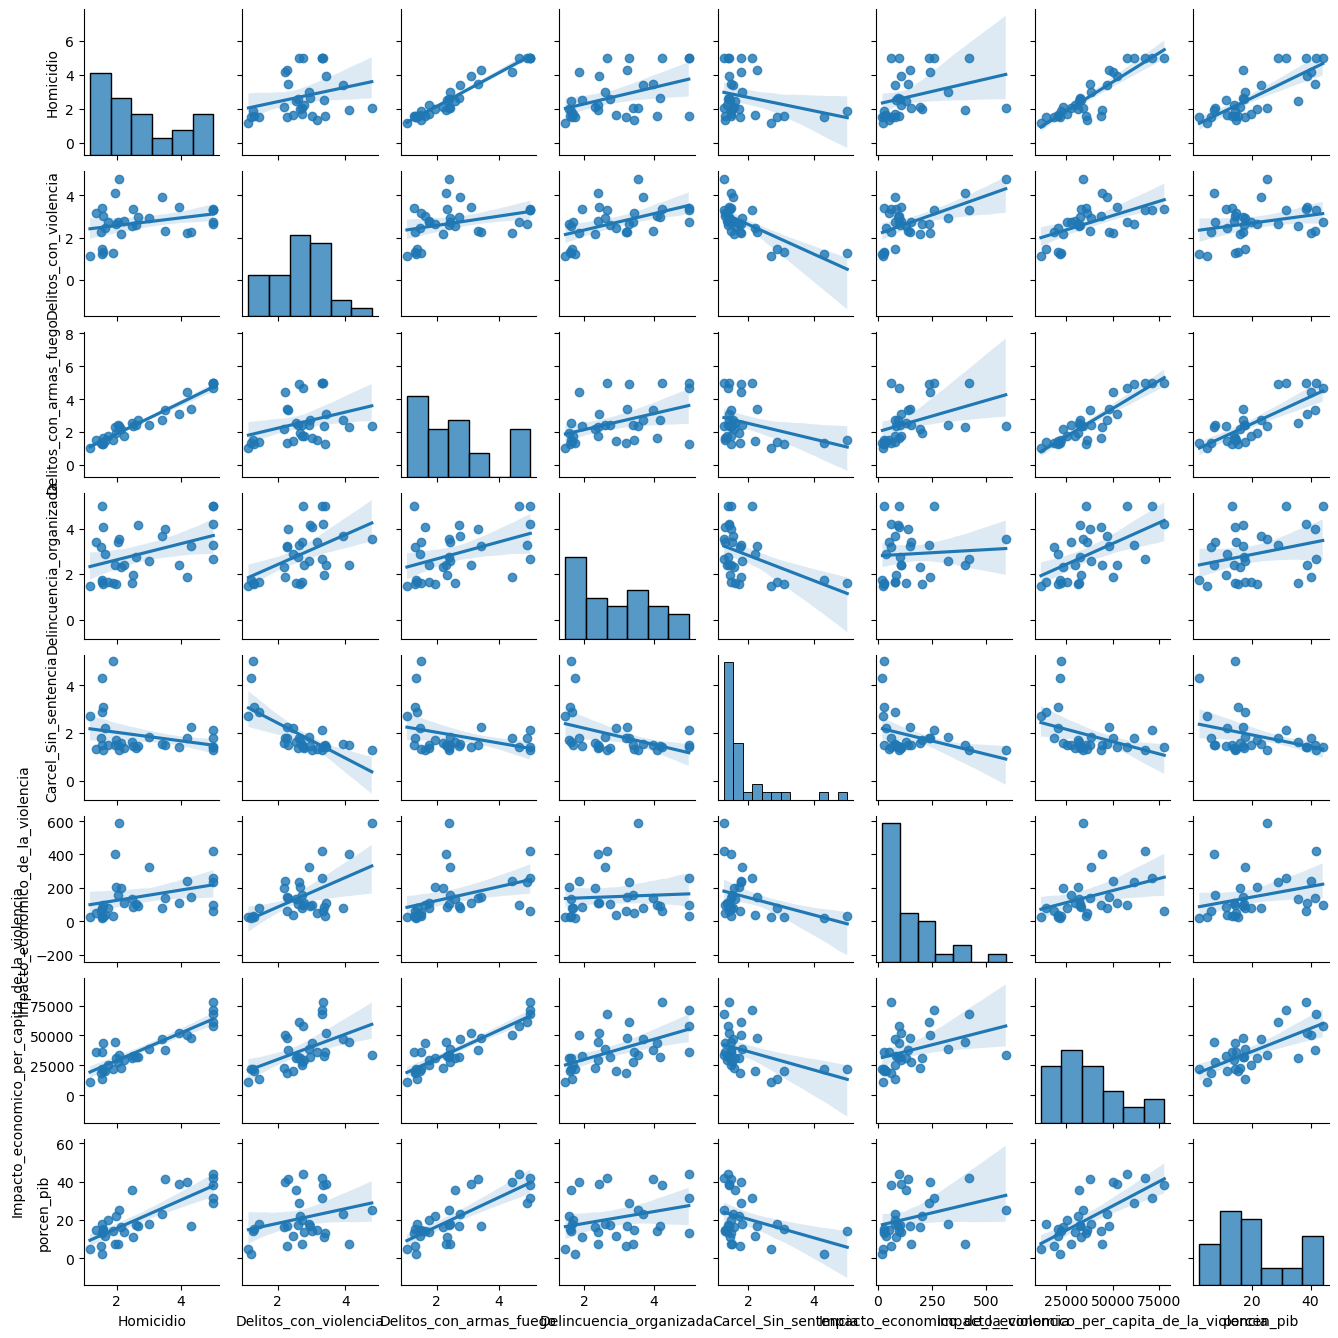

In [256]:
# Correlación lineal de variables
sns.pairplot(df, kind="reg",  height=1.7 , aspect=1)

## Normalización de datos

In [257]:
#Selección de caracteristicas para llevar a cabo el agrupamiento
features = ['Homicidio', 'Delitos_con_violencia','Delitos_con_armas_fuego', 'Delincuencia_organizada',
            'Impacto_economico_de_la_violencia']

In [258]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])

In [259]:
df_standardized 

array([[-1.06724887e+00,  5.53283611e-01, -8.75468305e-01,
         4.98800656e-01, -7.33802550e-01],
       [ 1.79847363e+00,  7.07991648e-01,  1.95465401e+00,
         1.94985711e+00,  8.63323975e-01],
       [-9.20491057e-01,  8.45909665e-01, -1.04962968e+00,
         1.94985711e+00, -9.11431933e-01],
       [-9.37060488e-01, -1.77813052e+00, -9.92382190e-01,
        -1.06926162e+00, -9.66796935e-01],
       [-9.28381262e-01, -1.51308807e+00, -9.70612018e-01,
        -1.15586435e+00, -5.27721708e-01],
       [ 1.79847363e+00, -7.75414070e-02,  1.86918593e+00,
         3.74424389e-01,  6.65701675e-01],
       [-6.21452282e-01,  1.68061349e+00, -2.34457694e-01,
        -4.65806396e-01,  1.94294152e+00],
       [-9.67043267e-01, -5.17679775e-01, -1.01899018e+00,
         2.95192100e-01, -6.79206506e-01],
       [ 1.79847363e+00,  7.65557429e-01,  1.95465401e+00,
         1.23492390e+00, -6.62289422e-01],
       [-8.45534108e-01, -2.91014512e-01, -9.03688898e-01,
         1.88003941e-02

(array([5., 7., 5., 4., 1., 1., 1., 2., 1., 5.]),
 array([-1.225842  , -0.92341043, -0.62097887, -0.31854731, -0.01611574,
         0.28631582,  0.58874738,  0.89117894,  1.19361051,  1.49604207,
         1.79847363]),
 <BarContainer object of 10 artists>)

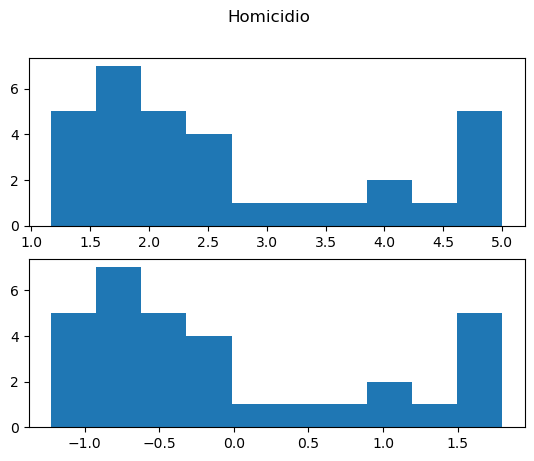

In [260]:
#Comparación antes y despues de la normalización (re-escalamiento)
Homicidio_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Homicidio')
ax1.hist(df['Homicidio'])
ax2.hist( Homicidio_list)

In [261]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)

In [262]:
df_standardized.head()

0         1         2         3         4
0 -1.067249  0.553284 -0.875468  0.498801 -0.733803
1  1.798474  0.707992  1.954654  1.949857  0.863324
2 -0.920491  0.845910 -1.049630  1.949857 -0.911432
3 -0.937060 -1.778131 -0.992382 -1.069262 -0.966797
4 -0.928381 -1.513088 -0.970612 -1.155864 -0.527722

## Separación de los datos en grupos

In [263]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', n_init = 'auto', random_state = 42)
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

159.99999999999997

## Método del codo

In [264]:
# Se obtienen los diferentes valores de WCSS 
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

In [265]:
wcss

[159.99999999999997,
 97.20427866244086,
 73.31450727957846,
 53.24314187716428,
 45.02473180633498,
 35.523286321819036,
 27.926364257499564,
 23.982197368229183,
 21.778045664953858,
 18.41592577356997,
 17.447163734494914,
 15.43248109793011,
 12.667506782190044,
 11.223163021505545,
 9.726469005287516,
 8.710266331915129,
 6.221146785547517,
 5.509321983606793,
 4.855822007668817]

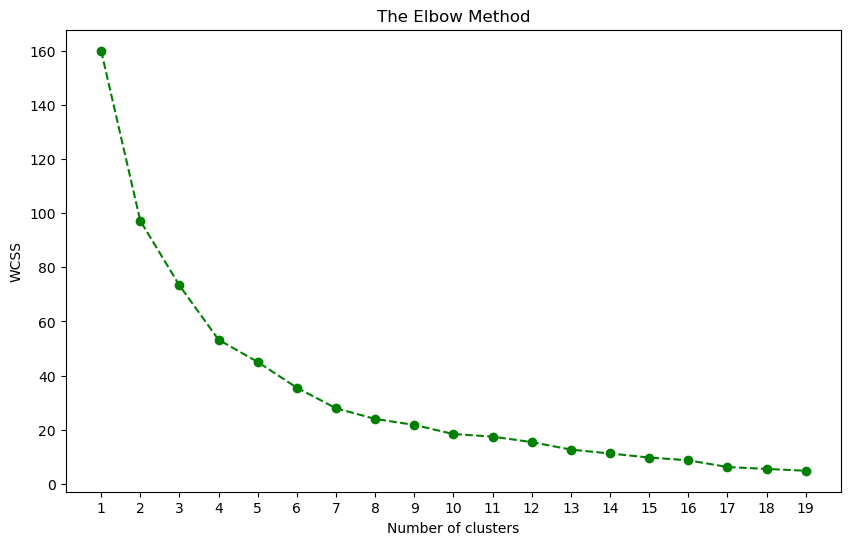

In [266]:
# Grafica de los valores de WCSS 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.show()

## Análisis de resultados del Método del codo

In [267]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 7, init = 'k-means++', n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

array([5, 2, 5, 3, 3, 6, 0, 5, 2, 1, 0, 6, 4, 1, 0, 6, 4, 3, 1, 1, 1, 5,
       4, 5, 1, 4, 1, 1, 3, 1, 3, 2])

In [268]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster_s'] = y_kmeans + 1
df.head()

Estados IDNAME  Homicidio  Delitos_con_violencia  \
0       AGUASCALIENTES     AS      1.368                  3.167   
1      BAJA_CALIFORNIA     BC      5.000                  3.296   
2  BAJA_CALIFORNIA_SUR     BS      1.554                  3.411   
3             CAMPECHE     CC      1.533                  1.223   
4              CHIAPAS     CS      1.544                  1.444   

   Delitos_con_armas_fuego  Delincuencia_organizada  Carcel_Sin_sentencia  \
0                    1.490                    3.425                 1.307   
1                    5.000                    5.000                 2.110   
2                    1.274                    5.000                 1.496   
3                    1.345                    1.723                 4.297   
4                    1.372                    1.629                 2.874   

   Impacto_economico_de_la_violencia  \
0                               51.9   
1                              259.6   
2                               28.8   
3                               21.6   
4                               78.7   

   Impacto_economico_per_capita_de_la_violencia  porcen_pib  cluster_s  
0                                         36158        14.5          6  
1                                         71413        31.5          3  
2                                         35761        13.4          6  
3                                         21543         2.2          4  
4                                         13742        17.8          4

<Axes: xlabel='Homicidio', ylabel='Delitos_con_armas_fuego'>

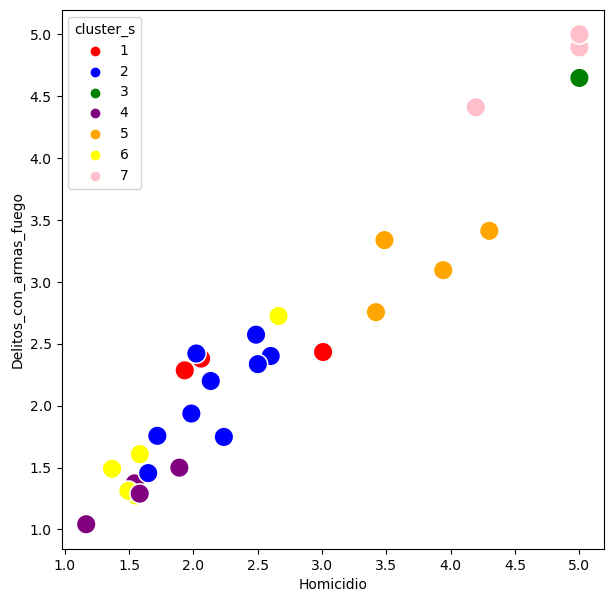

In [269]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(7,7))
sns.scatterplot(x='Homicidio', y = 'Delitos_con_armas_fuego', hue='cluster_s',  
                palette=['red','blue','green','purple','orange','yellow','pink'] , data=df, s=200)

<Figure size 500x500 with 0 Axes>

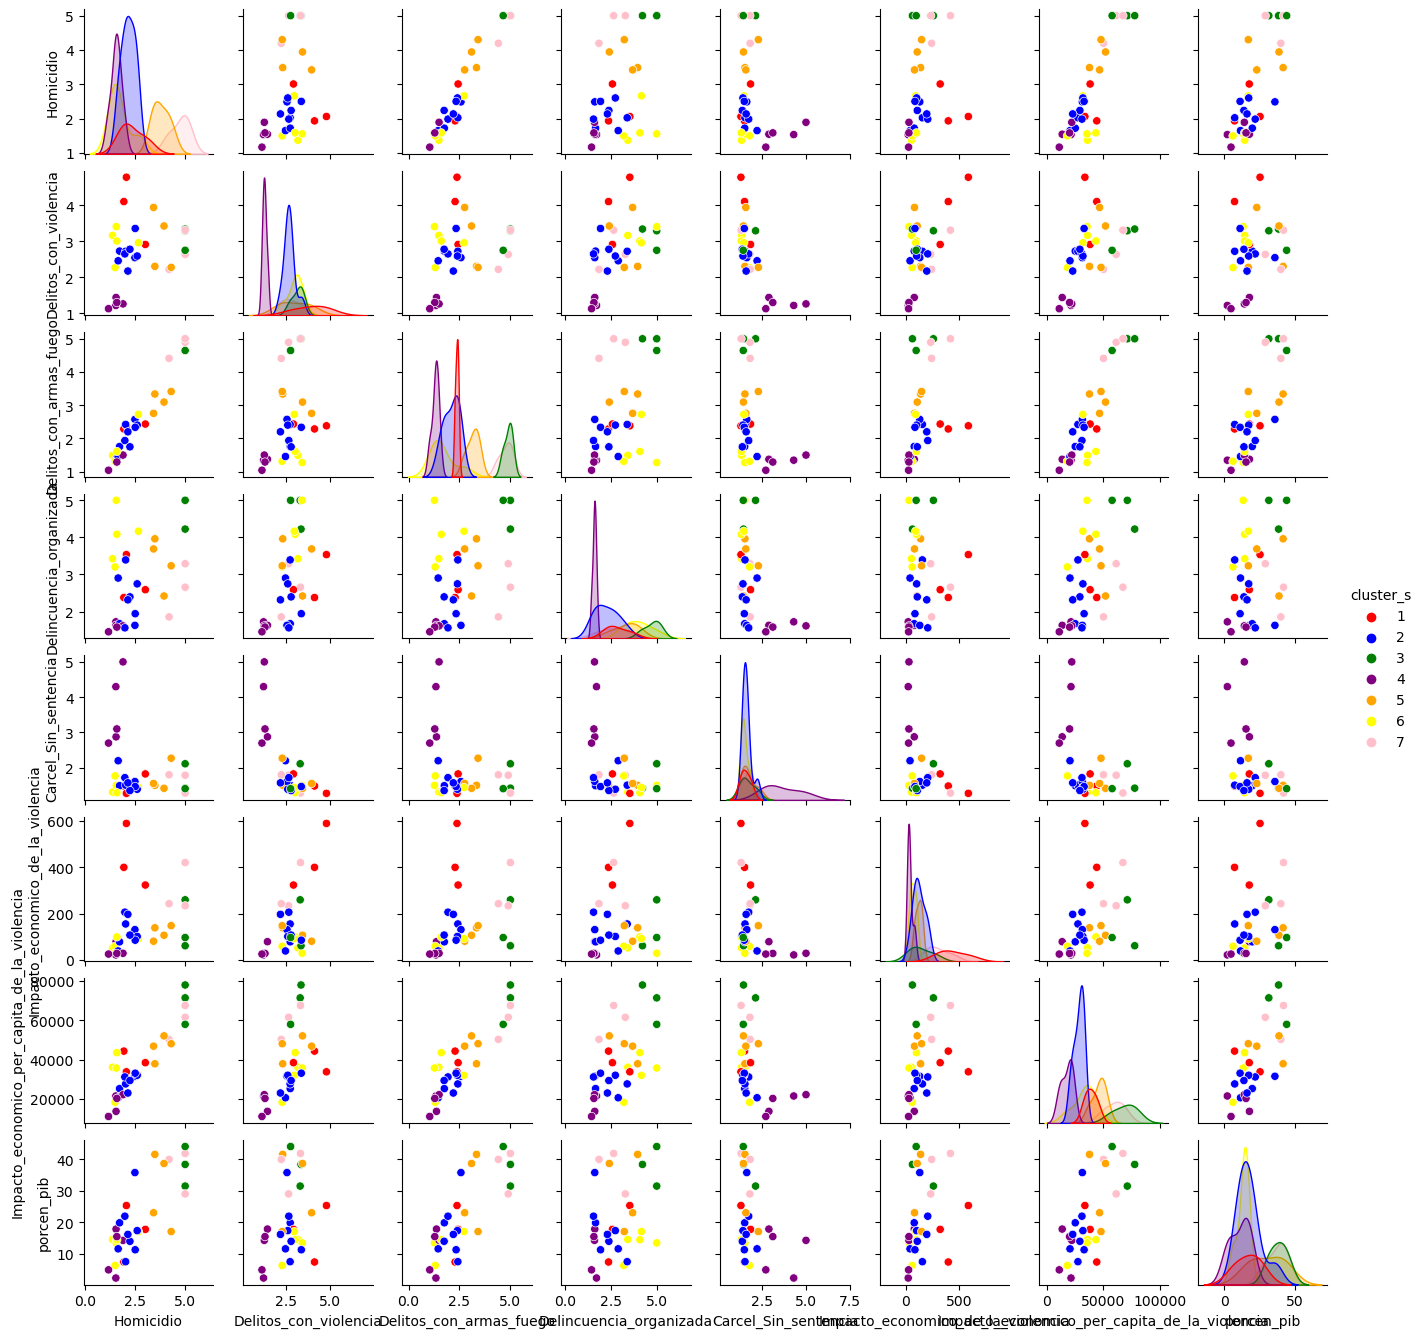

In [270]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df[["Estados","IDNAME","Homicidio","Delitos_con_violencia","Delitos_con_armas_fuego","Delincuencia_organizada"
               ,"Carcel_Sin_sentencia","Impacto_economico_de_la_violencia","Impacto_economico_per_capita_de_la_violencia"
               ,"porcen_pib","cluster_s"]], hue="cluster_s",  palette=['red','blue','green','purple','orange','yellow','pink'],height=1.7 , aspect=1)
plt.show()

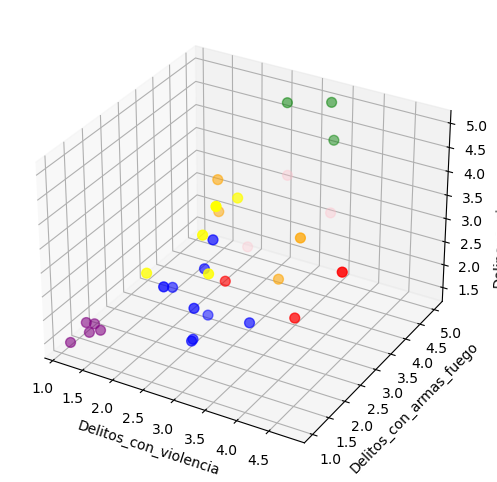

In [271]:
#Comparando Delitos_con_violencia,Delitos_con_armas_fuego y Delincuencia_organizada
#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Delitos_con_violencia']
y = df['Delitos_con_armas_fuego']
z = df['Delincuencia_organizada']
colors = df['cluster_s']
cmap = matplotlib.colors.ListedColormap(['red','blue','green','purple','orange','yellow','pink'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Delitos_con_violencia')
ax.set_ylabel('Delitos_con_armas_fuego')
ax.set_zlabel('Delincuencia_organizada')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [272]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df[["Estados","IDNAME","Homicidio","Delitos_con_violencia","Delitos_con_armas_fuego","Delincuencia_organizada"
               ,"Carcel_Sin_sentencia","Impacto_economico_de_la_violencia","Impacto_economico_per_capita_de_la_violencia"
               ,"porcen_pib","cluster_s"]]
df_map.head()

Estados IDNAME  Homicidio  Delitos_con_violencia  \
0       AGUASCALIENTES     AS      1.368                  3.167   
1      BAJA_CALIFORNIA     BC      5.000                  3.296   
2  BAJA_CALIFORNIA_SUR     BS      1.554                  3.411   
3             CAMPECHE     CC      1.533                  1.223   
4              CHIAPAS     CS      1.544                  1.444   

   Delitos_con_armas_fuego  Delincuencia_organizada  Carcel_Sin_sentencia  \
0                    1.490                    3.425                 1.307   
1                    5.000                    5.000                 2.110   
2                    1.274                    5.000                 1.496   
3                    1.345                    1.723                 4.297   
4                    1.372                    1.629                 2.874   

   Impacto_economico_de_la_violencia  \
0                               51.9   
1                              259.6   
2                               28.8   
3                               21.6   
4                               78.7   

   Impacto_economico_per_capita_de_la_violencia  porcen_pib  cluster_s  
0                                         36158        14.5          6  
1                                         71413        31.5          3  
2                                         35761        13.4          6  
3                                         21543         2.2          4  
4                                         13742        17.8          4

In [277]:
# Información geográfica de los Estados Unidos
estados_geo = 'datos/estadosGEO_mx.json'

In [278]:
# Librería Python que permite crear mapas interactivos 
import folium
map = folium.Map(location=[24, -102],zoom_start=5)

In [279]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['IDNAME', 'cluster_s'],
             key_on='feature.id',
             fill_color='Set1', fill_opacity=0.9, line_opacity=0.9, bins=7
                 ).add_to(map)
map

## Método de la Silueta

In [280]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [281]:
silhouette_score(df_standardized,  kmeans.labels_)

0.3380040401444186

In [282]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++', n_init = 'auto').fit(df_standardized) for i in range(1,20)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

array([0.3340507 , 0.25832008, 0.30404207, 0.35949214, 0.33430449,
       0.35820563, 0.31624379, 0.3497937 , 0.33070692, 0.31574699,
       0.30263188, 0.28533792, 0.28893823, 0.28389378, 0.25829743,
       0.24429668, 0.2663951 , 0.24302407])

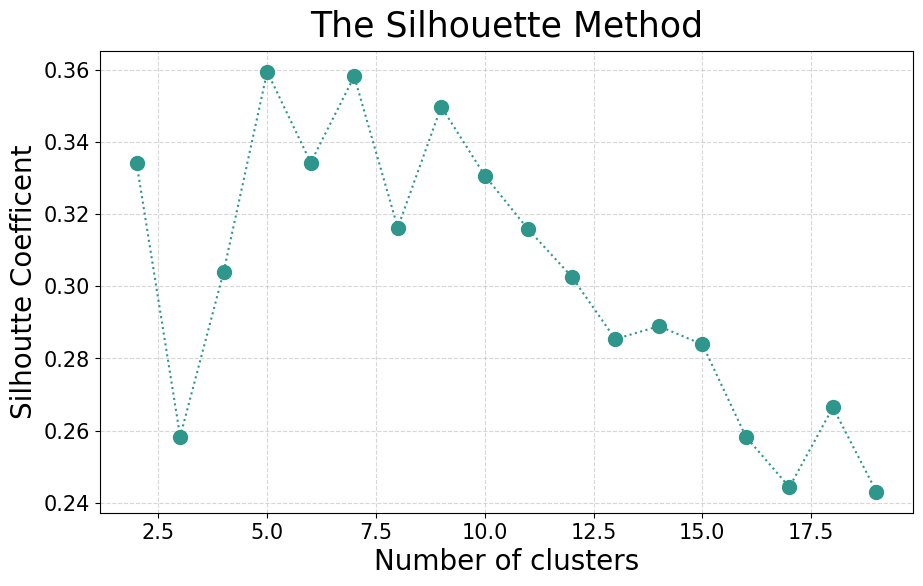

In [283]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 20), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [284]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.359492142529097
El número óptimo de clusters es: 5


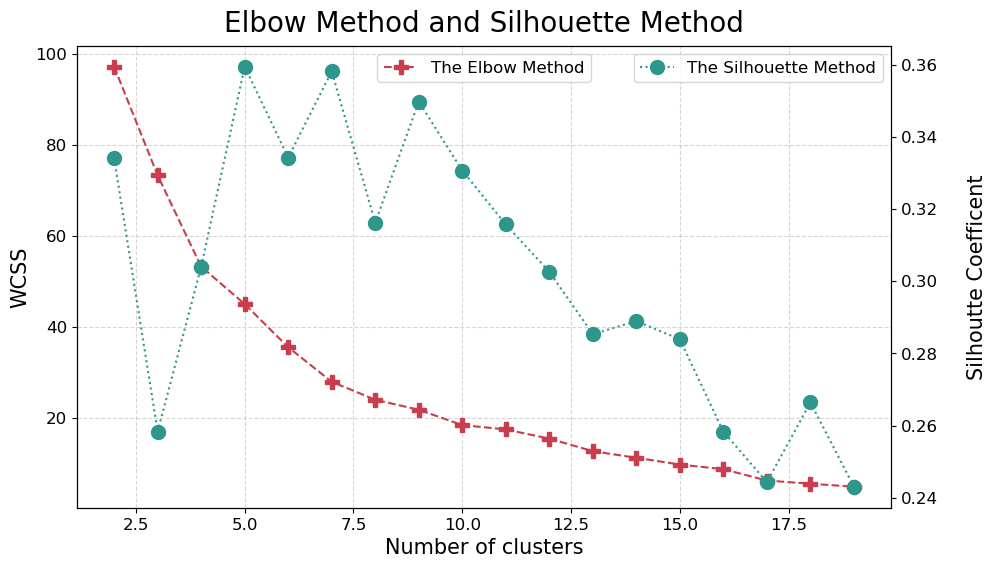

In [285]:
fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,20), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,20), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()